In [2]:
import json
data_dir = '/Users/xinyi/Project5/tweet_data' 
tweets_sb = []
with open(data_dir + '/tweets_#gopatriots.txt' , 'r') as f:
    for i, l in enumerate(f):
        tweet = json.loads(l)
        tweets_sb.append(tweet)

Confusion matrix, without normalization
[[  1 127]
 [  0 580]]
Normalized confusion matrix
[[ 0.01  0.99]
 [ 0.    1.  ]]


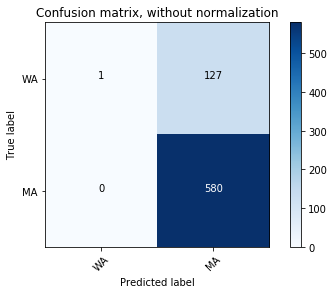

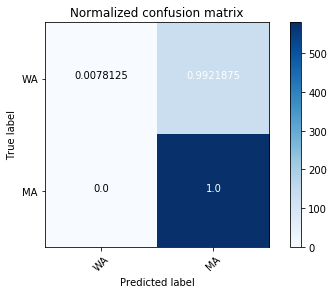

In [11]:
import re
import numpy as np
import itertools
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

washington_terms = ['Seattle, Washington', 'Washington', 'WA', 'Seattle, WA', 'Kirkland, Washington']
massachusetts_terms = ['massachusetts', 'ma','mass','boston，massachusetts','boston, ma']
class MyTokenizer(object):
    def __init__(self):
        self.stemmer = PorterStemmer()
        self.token_pattern = re.compile(u'(?u)\\b\\w\\w+\\b')
        
    def __call__(self, doc):
        return [self.stemmer.stem(w) for w in self.token_pattern.findall(doc)]

vectorizer = CountVectorizer(min_df=3, stop_words=text.ENGLISH_STOP_WORDS, tokenizer=MyTokenizer()) 
tfidf_transformer = TfidfTransformer()



def find_location(loc):
    for wt in washington_terms:
        if loc.lower().find(wt.lower()) >= 0:
            return "washington" # 0
    for mt in massachusetts_terms:
        if loc.lower().find(mt.lower()) >= 0:
            return "massachusetts" # 1
    return None

X, Y = [], []
for tweet in tweets_sb:
    location = find_location(tweet['tweet']['user']['location'])
    if location is None: continue # does not belong to either state
    X.append(tweet['tweet']['text'])
    Y.append(0 if location == "washington" else 1)

X = vectorizer.fit_transform(X)
X = tfidf_transformer.fit_transform(X)
Y = np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
# print(X.shape, y.shape)
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)
Y_pred_prob = logistic.predict_proba(X_test)
#show_stats(y_test, y_pred, y_pred_prob)



class_names = ['WA', 'MA']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()




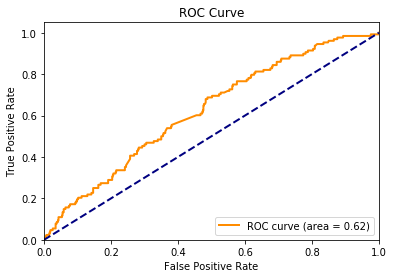

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob[:,0], pos_label=0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [17]:
from sklearn.metrics import roc_auc_score, precision_score, accuracy_score, recall_score
print ('Classification report:')
print ('=======================================================')
print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f' % (accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred)))
print ('=======================================================\n')

Classification report:
Accuracy = 0.821, Precision = 0.820, Recall = 1.000



SVM classifier (SVC)

In [20]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear',probability=True)
classifier_svc.fit(X_train, Y_train)

Y_pred = classifier_svc.predict(X_test)
Y_pred_prob = classifier_svc.predict_proba


Confusion matrix, without normalization
[[  4 124]
 [  3 577]]
Normalized confusion matrix
[[ 0.03  0.97]
 [ 0.01  0.99]]


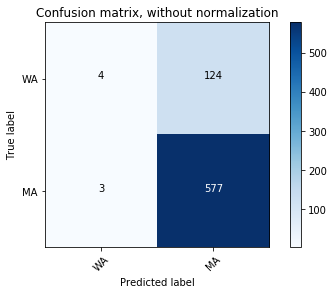

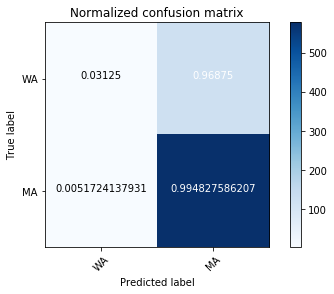

In [21]:
class_names = ['WA', 'MA']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



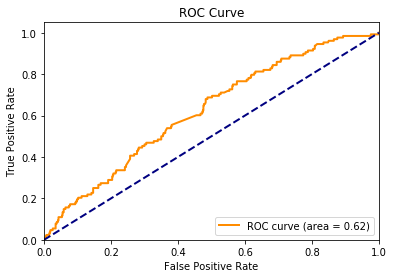

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob[:,0], pos_label=0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score, precision_score, accuracy_score, recall_score
print ('Classification report:')
print ('=======================================================')
print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f' % (accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred)))
print ('=======================================================\n')

Classification report:
Accuracy = 0.821, Precision = 0.823, Recall = 0.995



In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier()
classifier_KNN.fit(X_train, Y_train)

Y_pred = classifier_KNN.predict(X_test)
Y_pred_prob = classifier_KNN.predict_proba




Confusion matrix, without normalization
[[  9 119]
 [ 22 558]]
Normalized confusion matrix
[[ 0.07  0.93]
 [ 0.04  0.96]]


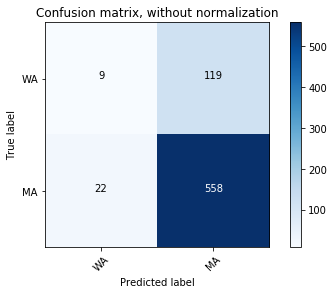

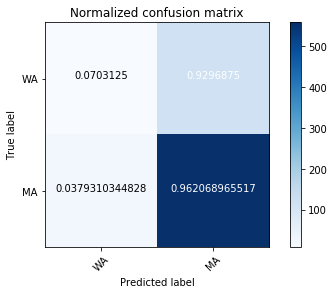

In [39]:
class_names = ['WA', 'MA']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



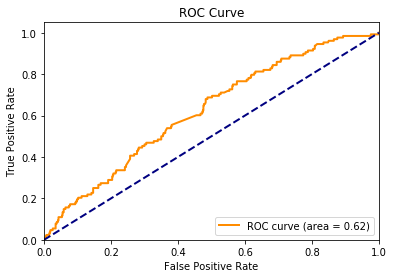

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob[:,0], pos_label=0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score, precision_score, accuracy_score, recall_score
print ('Classification report:')
print ('=======================================================')
print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f' % (accuracy_score(Y_test, Y_pred), precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred)))
print ('=======================================================\n')

Classification report:
Accuracy = 0.801, Precision = 0.824, Recall = 0.962

